In [23]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    pipeline,
)

In [24]:
def display_confusion_matrix(labels, label_predictions):
    disp = ConfusionMatrixDisplay(confusion_matrix(labels, label_predictions))
    disp.plot(cmap=plt.cm.Reds)
    plt.title("Confusion matrix", color="red")
    plt.xlabel('Predicted Label',color='black')
    plt.ylabel('True Label',color='black')
    plt.gcf().axes[0].tick_params(color="black")
    plt.gcf().axes[1].tick_params(color="black")
    plt.gcf().set_size_inches(10,6)

In [25]:
test_data = pd.read_csv("../data/processed/test.csv")
features = test_data.drop(["completion"], axis=1)
labels = test_data["completion"]

In [26]:
label_mapping = {
    'Clinical pharmacology': 0,
    'Dental care': 1,
    'Emergency medical care': 2,
    'General medical care': 3,
    'Infectious disease care': 4,
    'Internal medicine care': 5,
    'Laboratory services': 6,
    'Nuclear medicine': 7,
    'Occupational and sports medicine': 8,
    'Oncological care': 9,
    'Ophthalmological care': 10,
    'Otorhinolaryngological care': 11,
    'Pediatric care': 12,
    'Physical medicine and rehabilitation': 13,
    'Psychological and psychiatric care': 14,
    'Radiological diagnostics': 15,
    'Reproductive medicine': 16,
    'Specialized clinics': 17,
    'Surgical care': 18,
    "Women's health": 19
 }

In [27]:
labels.value_counts()

completion
10    10
16    10
1      9
4      8
8      8
6      7
15     7
14     7
19     7
13     7
18     6
0      6
17     6
9      6
5      6
12     6
3      5
7      5
11     3
2      3
Name: count, dtype: int64

### Random Forest

In [28]:
model = joblib.load("../models/randomforest.pkl")
label_predictions = model.predict(features)

Standard metrics

In [29]:
print(classification_report(labels, label_predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.67      0.22      0.33         9
           2       0.40      0.67      0.50         3
           3       0.00      0.00      0.00         5
           4       0.88      0.88      0.88         8
           5       0.38      0.50      0.43         6
           6       0.86      0.86      0.86         7
           7       0.71      1.00      0.83         5
           8       0.73      1.00      0.84         8
           9       0.60      0.50      0.55         6
          10       1.00      0.70      0.82        10
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         6
          13       0.67      0.86      0.75         7
          14       0.67      0.29      0.40         7
          15       0.75      0.86      0.80         7
          16       0.80      0.80      0.80        10
          17       0.55    

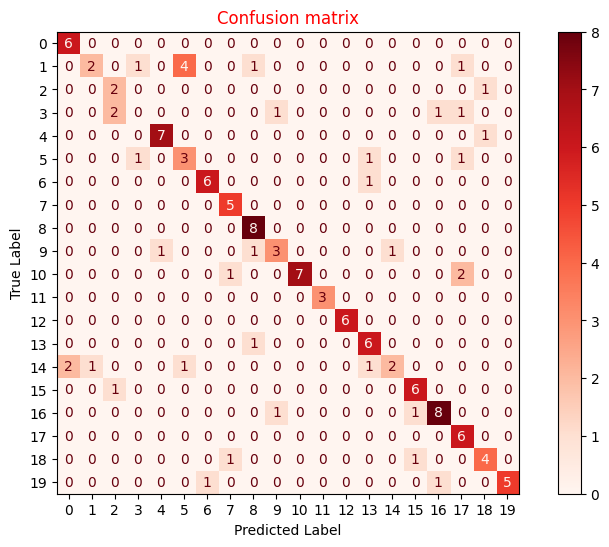

In [30]:
display_confusion_matrix(labels, label_predictions)

### Logistic Regression

In [31]:
model = joblib.load("../models/logreg.pkl")
label_predictions = model.predict(features)

Standard metrics

In [32]:
print(classification_report(labels, label_predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.33      0.50         9
           2       0.33      0.67      0.44         3
           3       0.20      0.20      0.20         5
           4       1.00      0.75      0.86         8
           5       0.75      0.50      0.60         6
           6       0.86      0.86      0.86         7
           7       0.71      1.00      0.83         5
           8       0.78      0.88      0.82         8
           9       0.75      1.00      0.86         6
          10       0.57      0.40      0.47        10
          11       0.60      1.00      0.75         3
          12       0.75      1.00      0.86         6
          13       0.60      0.86      0.71         7
          14       0.33      0.14      0.20         7
          15       0.75      0.86      0.80         7
          16       0.75      0.60      0.67        10
          17       0.67    

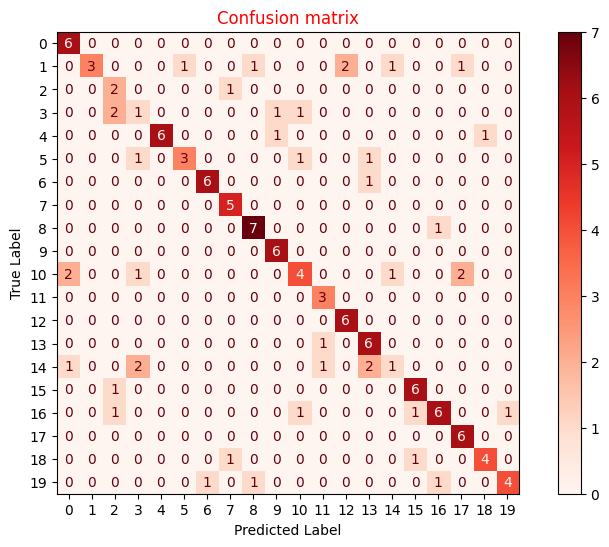

In [33]:
display_confusion_matrix(labels, label_predictions)

### Multinomial Naive Bayes

In [34]:
model = joblib.load("../models/multinomialnb.pkl")
label_predictions = model.predict(features)

Standard metrics

In [35]:
print(classification_report(labels, label_predictions))

              precision    recall  f1-score   support

           0       0.36      0.83      0.50         6
           1       1.00      0.11      0.20         9
           2       0.22      0.67      0.33         3
           3       0.00      0.00      0.00         5
           4       0.86      0.75      0.80         8
           5       0.27      0.67      0.38         6
           6       0.83      0.71      0.77         7
           7       0.67      0.80      0.73         5
           8       0.62      1.00      0.76         8
           9       0.29      0.33      0.31         6
          10       1.00      0.10      0.18        10
          11       1.00      0.67      0.80         3
          12       1.00      0.67      0.80         6
          13       0.60      0.86      0.71         7
          14       0.40      0.29      0.33         7
          15       0.75      0.86      0.80         7
          16       0.80      0.40      0.53        10
          17       0.62    

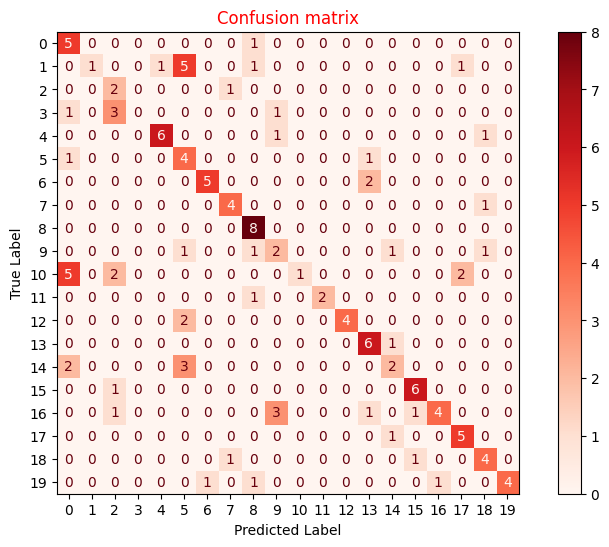

In [36]:
display_confusion_matrix(labels, label_predictions)

### XGBoost

In [37]:
model = joblib.load("../models/xgboost.pkl")
label_predictions = model.predict(features)

Standard metrics

In [38]:
print(classification_report(labels, label_predictions))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63         6
           1       0.50      0.11      0.18         9
           2       0.40      0.67      0.50         3
           3       0.00      0.00      0.00         5
           4       0.88      0.88      0.88         8
           5       0.17      0.33      0.22         6
           6       0.86      0.86      0.86         7
           7       0.57      0.80      0.67         5
           8       0.70      0.88      0.78         8
           9       0.38      0.50      0.43         6
          10       0.33      0.30      0.32        10
          11       1.00      1.00      1.00         3
          12       0.00      0.00      0.00         6
          13       0.67      0.57      0.62         7
          14       0.40      0.29      0.33         7
          15       1.00      0.86      0.92         7
          16       0.56      0.50      0.53        10
          17       0.50    

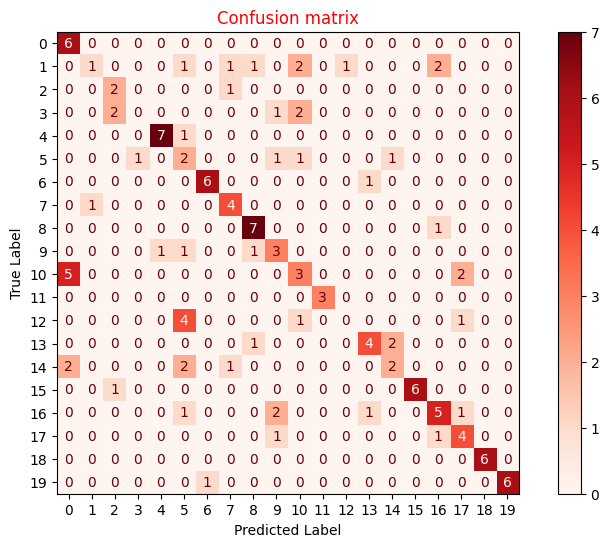

In [39]:
display_confusion_matrix(labels, label_predictions)

### BioBERT

In [40]:
#test_data = pd.read_csv("../data/processed/test_bert.csv")

In [41]:
#model = BertForSequenceClassification.from_pretrained("../models/biobert", num_labels=8)
#tokenizer = BertTokenizer.from_pretrained("../models/biobert/tokenizer")
#pipe = pipeline(task="text-classification", model=model, tokenizer=tokenizer)
#label_predictions = pipe(test_data["text"].tolist())

In [42]:
#label_predictions = [int(label["label"][-1]) for label in label_predictions]

Standard metrics

In [43]:
#print(classification_report(labels, label_predictions))

In [44]:
#display_confusion_matrix(labels, label_predictions)